![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [2]:
# Métodos do retângulo, ponto médio e simpson.
# Nomes: retangulo, midpoint, simpson
# Forma: (f,a,b,n=100)

def retangulo(f, a, b, n=100):
    ls = np.linspace(a, b, n+1)
    sigma = 0
    for k in range(1, n+1):
        sigma += (ls[k]-ls[k-1])*f(ls[k-1])
    return sigma

def midpoint(f, a, b, n=100):
    ls = np.linspace(a, b, n+1)
    sigma = 0
    for k in range(1, n+1):
        sigma += (ls[k]-ls[k-1])*f(
            np.mean([
                ls[k-1],
                ls[k]
            ])
        )
    return sigma

def simpson(f, a, b, n=100):
    ls = np.linspace(a, b, n+1)
    sigma = 0
    for k in range(1, n+1):
        ka = ls[k-1]
        kb = ls[k]
        sigma += ((kb-ka)/6) * (
            f(ka) + 4*f((ka+kb)/2) + f(kb)
        )
    return sigma
    

methods = [retangulo, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

In [3]:
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [4]:
f = np.abs

## Questão 1: Dê uma primitiva de $f$.

In [5]:
def F(x):
    return np.power(x,2)*np.sign(x)/2

In [6]:
assert np.abs(df(F,1) - 1) < 1e-12

In [7]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [8]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil

In [9]:
df(F,0)

3.814697265625e-06

## Questão 2: Convergência das integrais

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$?

1. Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos
    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda
2. Depois, dê a ordem do método do retângulo

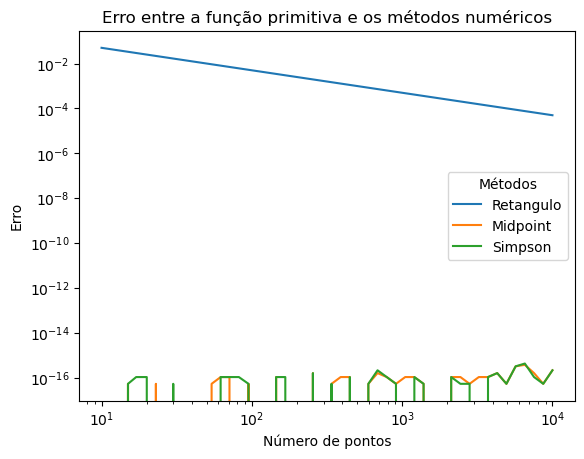

In [10]:
ans = F(1) - F(0)
ns = np.logspace(1,4,dtype=int)
ys = dict()
for m in methods:
    ys[m.__name__] = [
        np.abs(ans - m(f, 0, 1, n))
        for n in ns
    ]
    plt.plot(ns, ys[m.__name__], label=m.__name__.capitalize())

plt.title("Erro entre a função primitiva e os métodos numéricos")
plt.xlabel("Número de pontos")
plt.ylabel("Erro")
plt.xscale("log")
plt.yscale("log")
plt.legend(title="Métodos")
plt.show()

In [11]:
# Forma da resposta: decay_speed = n
decay_speed = 1

In [12]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = retangulo(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = retangulo(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    print(err2/err1)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

0.5000000000818645
0.5000000000018435
0.5000000000003675
0.49999999999908395
0.5000000000003496
0.5


Explique porque o teste está dando a ordem de convergência (Bônus)

O teste dá a ordem de convergência pois a mesma representa o quanto o erro diminui conforme se 
dobra a quantidade de pontos. Assim, é de se esperar que, dado que a ordem do método do retângulo 
é $1$, o erro diminui pela metade quando se dobra o número de pontos. Dessa forma, a razão dos 
erros será aproximadamente $\frac{1}{2}$ e, já que $2^{-\mathrm{decay}} = 2^{-1} = \frac{1}{2}$, 
o valor absoluto da diferença desses será próximo de zero e o `assert` será verdadeiro.

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

Ambos os métodos do ponto médio e de Simpson convergem rápido e possuem erros muito baixos, que 
ocorrem devido a precisão do ponto flutuante.

## Questão 3: Mudando o intervalo de integração

Agora, faça o gráfico do erro para o intervalo $[-1,2]$.

In [13]:
# Faça aqui uma função genérica para "fazer gráficos de erro"
# f é a função, [a,b] o intervalo de integração, ans a "resposta correta"
def graph_err(f,a,b,ans):
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        y = [
            np.abs(ans - m(f, a, b, n))
            for n in ns
        ]
        plt.plot(ns, y, label=m.__name__.capitalize())
    plt.title(f"Erro entre a função primitiva e os métodos numéricos\nIntervalo [{a}, {b}]")
    plt.xlabel("Número de pontos")
    plt.ylabel("Erro")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(title="Métodos")
    plt.tight_layout()
    return plt.axes

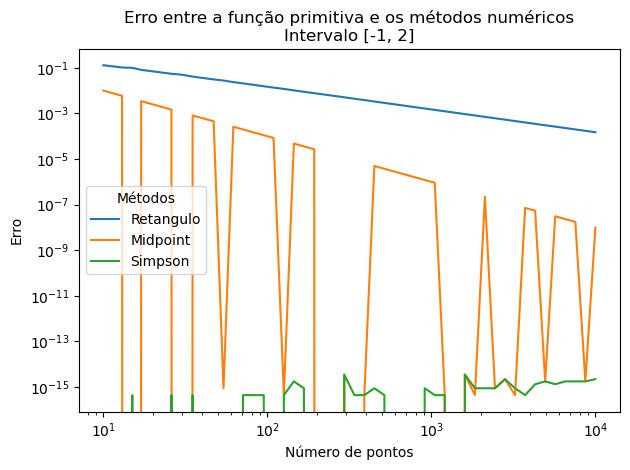

In [14]:
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
plt.show()

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

O método do retângulo possui um erro mais estável e converge mais devagar, o que é explicado pelo 
método ser uma aproximação mais simples. O método midpoint é mais instável e possui uma variação 
grande, visto que a mudança no número de pontos pode fazer com que o ponto médio fique mais 
distante da curva da função. Por fim, o método de Simpson é o mais preciso, converge rápidamente e 
demonstra boa estabilidade (considerando a escala de grandeza do erro nesse método), o que é 
explicado pela qualidade da aproximação por uma curva.

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

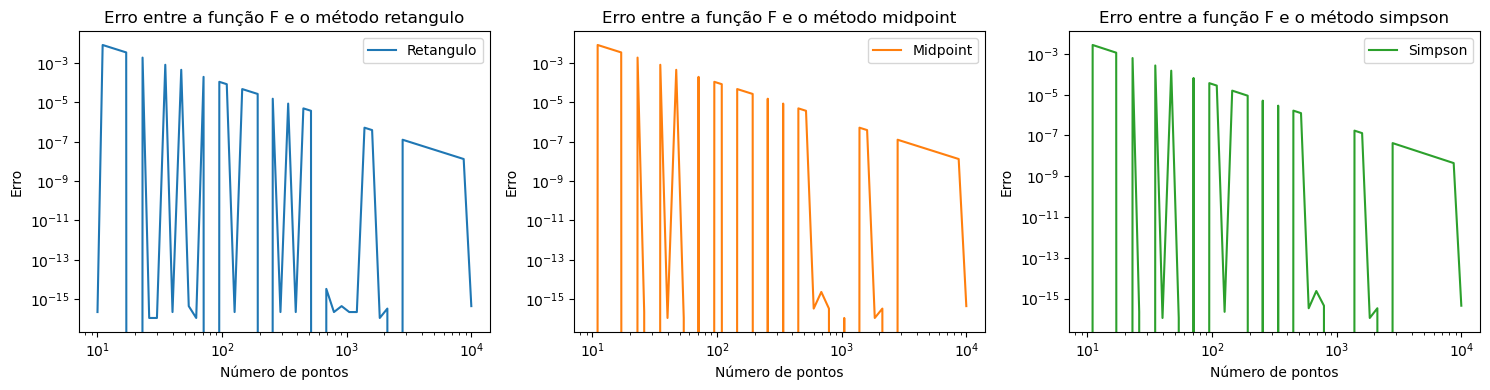

In [15]:
ans = F(1) - F(-1)
ns = np.logspace(1,4,dtype=int)
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for m,ax,c in zip(methods,axs,range(3)):
    y = [
        np.abs(ans - m(f, -1, 1, n))
        for n in ns
    ]
    ax.plot(ns, y, label=m.__name__.capitalize(), color=f"C{c}")
    ax.set_title(f"Erro entre a função F e o método {m.__name__}")
    ax.set_xlabel("Número de pontos")
    ax.set_ylabel("Erro")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend()
plt.tight_layout()
plt.show()

O que aconteceu agora?
Porquê?

Todos os métodos possuem gráfico de erro e velocidade de convergência bastante parecidas. Isso 
provavelmente ocorre por causa de alguma particularidade do intervalo observado.

## Questão 4: Intervalos "aleatórios"!

Como sugerido abaixo:
- Estude em três intervalos aleatórios;
- Para cada um deles, dê a evolução dos erros dos métodos conforme $n$ aumenta.

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

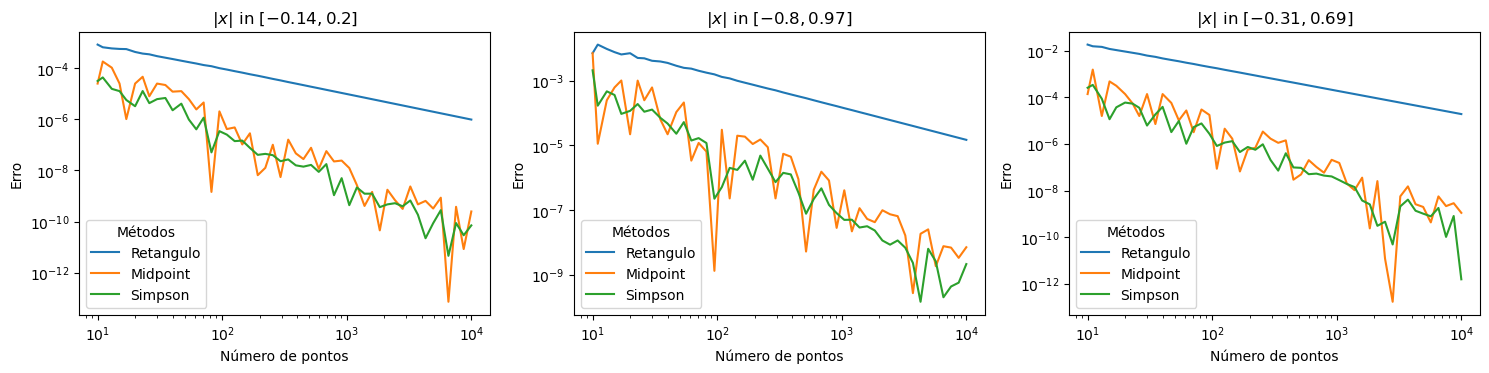

In [16]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    # Três intervalos aleatórios!
    a,b = -np.random.rand(), np.random.rand()
    plt.sca(ax) # Porque a função "graph_err" age "no eixo corrente"
    graph_err(f, a, b, F(b)-F(a))
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
plt.show()

Como você interpreta o que aconteceu?

O comportamento foi o esperado, baseado nas observações anteriores. O método do retângulo converge 
com ordem $1$ e possui os maiores erros. Os métodos midpoint e de Simpson possuem erro menor, 
e são semelhantes entre si.

# Parte 2: Uma função descontínua

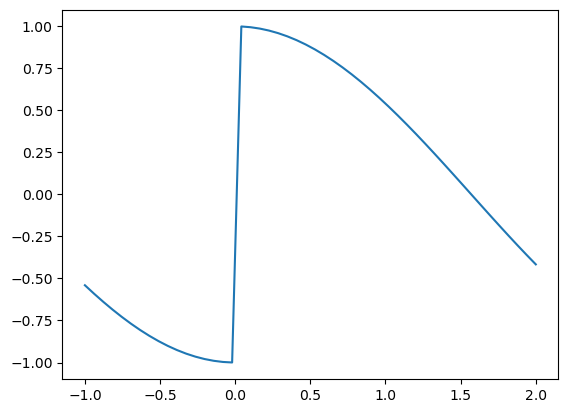

In [17]:
def g(x):
    return np.cos(x)*np.sign(x)

ts = np.linspace(-1,2)
plt.plot(ts, g(ts))
plt.show()

## Questão 5: Dê uma primitiva de $g$

In [18]:
def G(x):
    return np.sin(x)*np.sign(x)

In [19]:
assert np.abs(df(G,1) - g(1)) < 1e-12

In [20]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(G,xs) - g(xs))/g(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 6: Gráficos de erro!

- Para os intervalos [-1,1] e [-1,2]

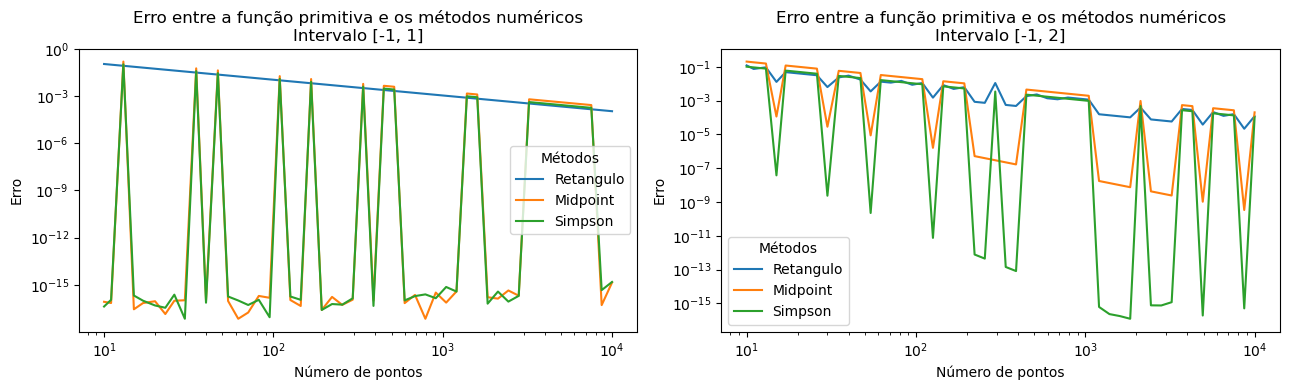

In [21]:
_, axs = plt.subplots(ncols=2, figsize=(13,4))
plt.sca(axs[0])
graph_err(g, -1, 1, G(1)-G(-1))
plt.sca(axs[1])
graph_err(g, -1, 2, G(2)-G(-1))
plt.show()

E agora para três intervalos aleatórios

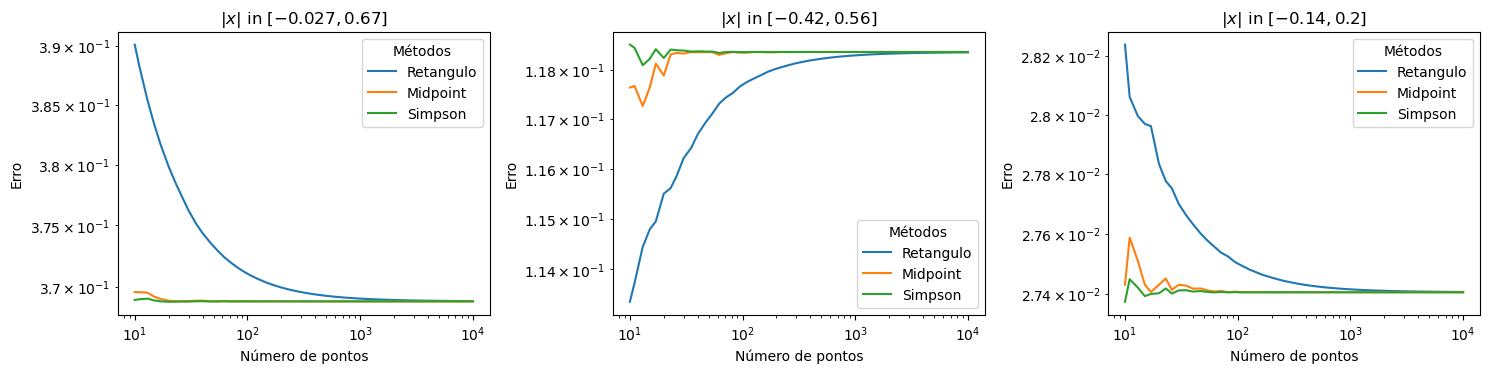

In [22]:
# Um intervalo aleatório!
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    a,b = -np.random.rand(), np.random.rand()
    plt.sca(ax)
    graph_err(f, a, b, G(b)-G(a))
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?

O método do retângulo tem desempenho inferior aos métodos midpoint e de Simpson para menos pontos. 
O desempenho dos métodos para as funções descontínuas é análogo ao das funções contínuas, visto que 
os métodos midpoint e de Simpson tem erro próximo e o de Simpson apresenta resultados um pouco 
melhores.